# `pycap-dss` demonstrations

## First, make some imports

In [1]:
import sys
sys.path.insert(1, '../../')
import pycap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Individual Functions

### Set some common variables to evaluate. Note that the units here are using SI units. Almost all the functions in this suite are arbitrary provided the units are self-consistent. In other words, if T is provided in m/d, then Q must by in m**3/d and so on.

In [2]:
T = 1000    # Transmissivity [m/day]
S = 3e-6   # Storativity [unitless]
dist = 500 # distance [m]
time = np.logspace(.1,2.5,150) # time [day]
Q = 4000   # pumping rate [m**3/day]


## Theis Drawdown

In [3]:
from pycap.solutions import theis

In [4]:
s_theis = theis(T,S,time,dist,Q)

Text(0, 0.5, 'drawdown')

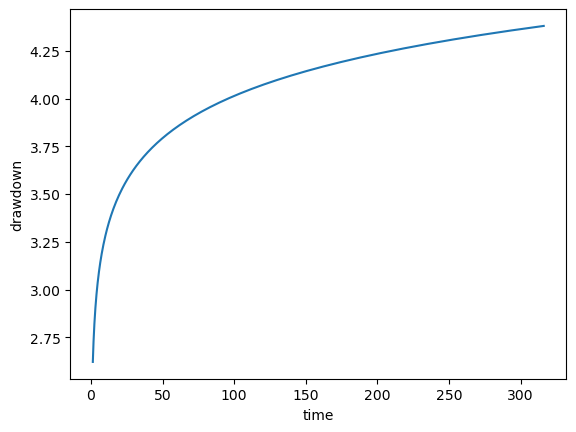

In [5]:
plt.plot(time,s_theis)
plt.xlabel('time')
plt.ylabel('drawdown')

## Ward-Lough 2-Layer Drawdown

### We need a couple more variables (assuming the previously defined variables pertain to the upper aquifer, then the lower aquifer is defined by T2,S2, etc.) and river and aquitard characterstics.

In [6]:
T2 = 1400 # Deep aquifer Transmissivity [m/day]
S2 = 1e-4 # Deep aquifer Storativity [unitless]
width = 10 # stream width [m]
streambed_thick = 20 # stream sediment thickness [m]
streambed_K = 250 # streambed hydraulic conductivity 
aquitard_thick = 1 # aquitard thickness [m]
aquitard_K = 50 # aquitard hydraulic conductivity
x = 20      # x-location at which to calculate drawdown 
            # (x=0 is at the stream)
y = 5       # x-location at which to calculate drawdown 
            # (y=0 is the along-stream location of the pumping well)

In [7]:
from pycap.solutions import WardLoughDrawdown

In [8]:
s_wl= WardLoughDrawdown(T,S, time, dist, Q,
                        width=width, 
                        T2=T2,S2=S2,streambed_thick=streambed_thick, 
                        streambed_K=streambed_K,
                        aquitard_thick=aquitard_thick, 
                        aquitard_K=aquitard_K,
                        x=x,y=y)

Text(0, 0.5, 'drawdown')

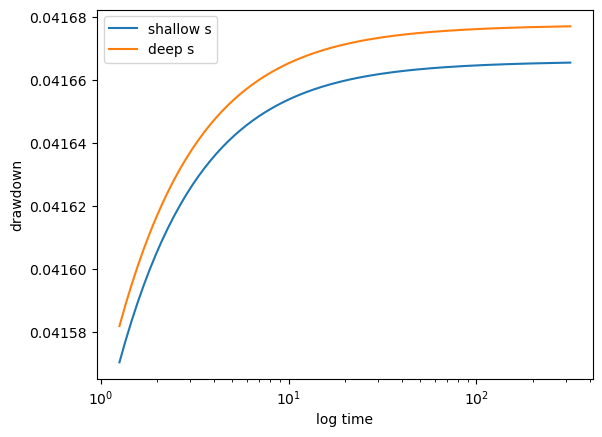

In [9]:
plt.plot(time,s_wl[:,0], label='shallow s')
plt.plot(time,s_wl[:,1], label='deep s')
plt.legend()
plt.xscale('log')
plt.xlabel('log time')
plt.ylabel('drawdown')

## Walton Depletion

### Note that this function must use Imperial units of feet for length and days for time.

In [10]:
from pycap.solutions import walton

In [11]:
qd = walton(T*.3048,S,time,dist,Q*(.3048**3))

Text(0, 0.5, 'depletion')

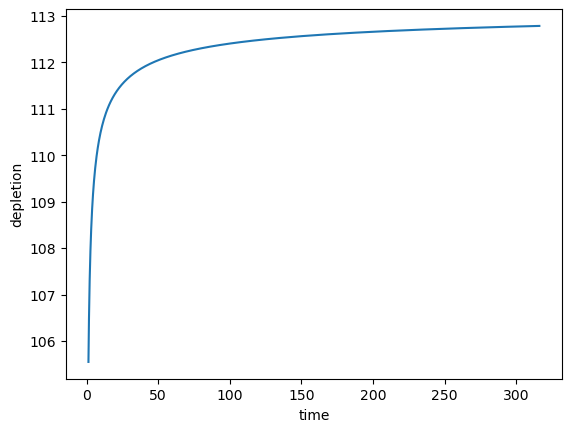

In [12]:
plt.plot(time,qd)
plt.xlabel('time')
plt.ylabel('depletion')

## Glover Depletion

In [13]:
from pycap.solutions import glover

In [14]:
qd = glover(T,S,time,dist,Q)

Text(0, 0.5, 'depletion')

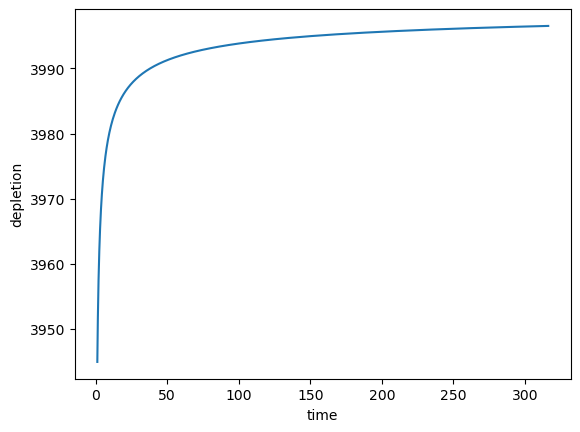

In [15]:
plt.plot(time,qd)
plt.xlabel('time')
plt.ylabel('depletion')

## Ward-Lough 2-Layer Depletion

In [16]:
from pycap.solutions import WardLoughDepletion

In [17]:
qd_wl = WardLoughDepletion(T,S, time, dist, Q, 
                            T2=T2,S2=S2,width=width,
                            streambed_thick=streambed_thick,
                            streambed_K=streambed_K,
                            aquitard_thick=aquitard_thick,
                            aquitard_K=aquitard_K)


Text(0, 0.5, 'depletion')

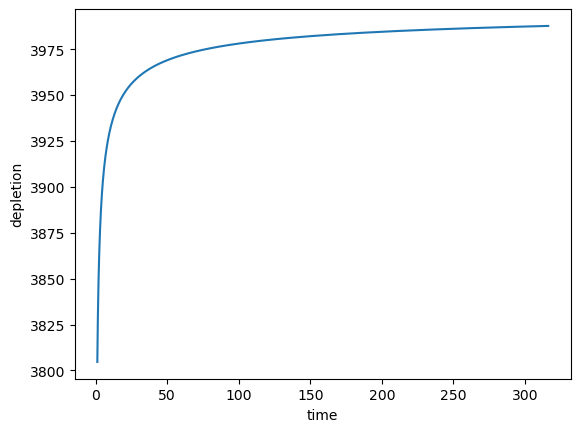

In [18]:
plt.plot(time,qd_wl)
plt.xlabel('time')
plt.ylabel('depletion')